Abbiamo scelto il seguente polinomio 
$$P(x)=x^2/2$$



Text(0.5,1,'Grafico di P(x)')

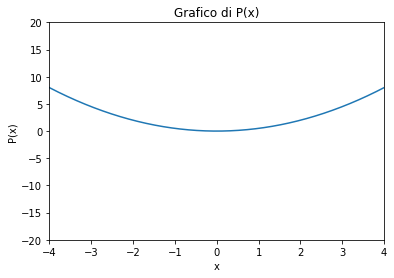

In [25]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 1000)  # 100 evenly-spaced values from 0 to 50
y = x**2/2

plt.plot(x, y)

plt.xlim(-4,4)
plt.ylim(-20, 20)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Grafico di P(x)')






Concentriamo il nostro studio nell'intervallo $[-3,\,3]$, in cui ci sono diversi cambi di concavità. 
Ora dobbiamo decidere come simulare le misure, o meglio con quale intervallo $\Delta x$ prendere le misure. Il modo più semplice, e forse troppo naif, è prendere le misure uniformemente distribuite nell'intervallo  di interesse. Questo non è così diverso, da molti strumenti di misura automatizzati, ad esempio gli strumenti elettronici per misurare la variazione di intensità di un raggio luminoso nel tempo, registrano il valore dell'intensità con un certo intervallo fissato. 
Questo metodo può essere migliorato con una seconda misura: dopo la prima misura stimiamo i coefficienti del polinomio, e così la posizione di eventuali picchi e cambi di flesso, a questo punto possiamo ripetere la misura aumentando la concentrazione delle misure attorno ai questi punti.
Per utilizzare l'algoritmo di Gauss-Markov per la stima di $\vec{\beta}$, il numero $N$ delle misure deve essere almeno pari al numero dei parametri incogniti. In una prima fase, perciò, prendiamo le misure ad intervalli costanti, e scegliamo i seguenti intervalli:
 <ul>
  <li>$\Delta x=1$ , cioè $N=6$ pari al numero di parametri incogniti</li>
  <li>$\Delta x=0.6$ , cioè $N=10$</li>
  <li>$\Delta x=0.03$ , cioè $N=20$</li>
</ul>



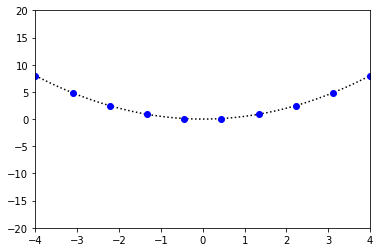

In [20]:
x = np.linspace(-4, 4, 1000)
y = x**2/2

plt.plot(x, y, ':k')

plt.xlim(-4,4)
plt.ylim(-20, 20)
x_m1=np.linspace(-4, 4, 10)
y_m1 = x_m1**2/2

plt.plot(x_m1, y_m1, 'bo', label='N=6')




Per quanto riguarda la varianza, invece, non possiamo fare altro che determinarla empiricamente, o meglio determinare empiricamente uno o più valori che sia ragionevole. Le misure sono equivariate e indipendenti per ipotesi, così da poter scrivere $C_y=\sigma_y I$. Come test di controllo usiamo una $\sigma _y=0$.
 Allora possiamo generare con un generatore di numeri casuali con distribuzione gaussiana.

[ 8.96345812 -0.4930175   1.14303735 -1.31023094 -1.06355331 -0.09450496
  0.07739405  0.99005045  0.46651257  6.03510723]
I coefficienti sono: -0.413   -0.289   0.496
La matrice di covarianza dei parametri stimati è
0.1373    0.0069 -0.0098
0.0069    0.0275 -0.0004
0.0026 -0.0098  -0.0004


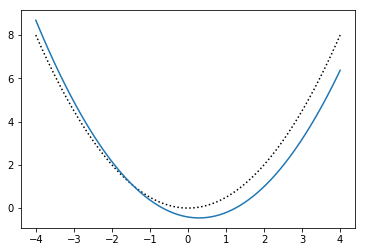

In [54]:
beta_real=np.array([0,0,1.0/2]) #questi sono i coefficienti del polinomio
g=2 #grado del polinomio
N=10 #numero di misure
sigma=1
Cy=sigma*np.identity(N)
x_m1=np.linspace(-4, -1, 2)
x_m2=np.linspace(-1, 1, 6)
x_m3=np.linspace(-1, 4, 2)
ym=np.empty(N)
W=np.empty((N,g+1))                  #generiamo la matrice W
for j in range(0,g+1,1) :
    for i in range(0,2,1):
        if j==0:
            W[i][j]=1
        else:
            W[i][j]=x_m1[i]**j
for j in range(0,g+1,1) :
    for i in range(2,8,1):
        if j==0:
            W[i][j]=1
        else:
            W[i][j]=x_m2[i-2]**j
for j in range(0,g+1,1) :
    for i in range(8,10,1):
        if j==0:
            W[i][j]=1
        else:
            W[i][j]=x_m3[i-8]**j
#print W

p=np.matmul(W,beta_real)
#print p

ym=np.random.normal(p,sigma)
print ym

#plt.plot(x, y, ':r')
#plt.plot(x_m1, ym, 'ro')


#beta_1=np.linalg.inv(np.matmul(np.matmul(W.transpose(),np.linalg.inv(Cy)),W))
#beta_2=np.matmul(np.matmul(W.transpose(),np.linalg.inv(Cy)),ym)
#beta_stima=np.matmul(beta_1,beta_2)
#print beta_stima

beta_1=np.linalg.inv(np.matmul(W.transpose(),W))
beta_2=np.matmul(W.transpose(),ym)
beta_stima=np.matmul(beta_1,beta_2)
ys= beta_stima[0]+beta_stima[1]*x+beta_stima[2]*x**2
plt.plot(x, y,':k')
plt.plot(x, ys)

print 'I coefficienti sono:' ,
print('   '.join([str(round(elem,3)) for elem in beta_stima]))

print 'La matrice di covarianza dei parametri stimati è'
Cb=np.linalg.inv(np.matmul(np.matmul(W.transpose(),np.linalg.inv(Cy)),W))
for row in Cb:
    print('    '.join([str(round(elem,4)) for elem in row if elem>0])),
    print('  '.join([str(round(elem,4)) for elem in row if elem<=0]))




[ 6.98469056  4.3972842   3.45846873  1.32081174 -0.53485413  0.64938514
  0.84381408  2.97892298  3.45500586  9.33513027]
I coefficienti sono: 0.157   0.081   0.481
La matrice di covarianza dei parametri stimati è
0.22891 -0.0  -0.01978
0.01534    0.0 -0.0
0.0    0.00303 -0.01978


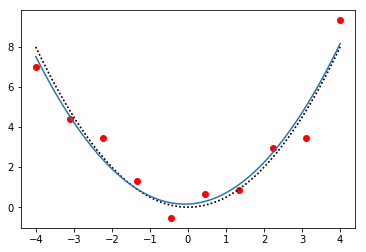

In [53]:
beta_real=np.array([0,0,1.0/2]) #questi sono i coefficienti del polinomio
g=2 #grado del polinomio
N=10 #numero di misure
sigma=1
Cy=sigma*np.identity(N)
x_m1=np.linspace(-4, 4, N)
ym=np.empty(N)
W=np.empty((N,g+1))                  #generiamo la matrice W
for j in range(0,g+1,1) :
    for i in range(0,N,1):
        if j==0:
            W[i][j]=1
        else:
            W[i][j]=x_m1[i]**j

#print W

p=np.matmul(W,beta_real)
#print p

ym=np.random.normal(p,sigma)
print ym

plt.plot(x, y, ':r')
plt.plot(x_m1, ym, 'ro')

beta_1=np.linalg.inv(np.matmul(W.transpose(),W))
beta_2=np.matmul(W.transpose(),ym)
beta_stima=np.matmul(beta_1,beta_2)
ys= beta_stima[0]+beta_stima[1]*x+beta_stima[2]*x**2
plt.plot(x, y,':k')
plt.plot(x, ys)

print 'I coefficienti sono:' ,
print('   '.join([str(round(elem,3)) for elem in beta_stima]))

print 'La matrice di covarianza dei parametri stimati è'
Cb=np.linalg.inv(np.matmul(np.matmul(W.transpose(),np.linalg.inv(Cy)),W))
for row in Cb:
    print('    '.join([str(round(elem,5)) for elem in row if elem>0])),
    print('  '.join([str(round(elem,5)) for elem in row if elem<=0]))




[ 6.87875541  5.08175338  3.65756245 -0.68753725  0.61274097  0.45302987
  0.53052697  1.31622418  2.52625439  6.95861115]
I coefficienti sono: 0.345   -0.069   0.43
La matrice di covarianza dei parametri stimati è
0.1907    0.0069 -0.016
0.0069    0.0188    0.0001 
0.0001    0.0029 -0.016


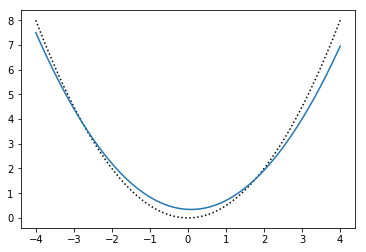

In [51]:
beta_real=np.array([0,0,1.0/2]) #questi sono i coefficienti del polinomio
g=2 #grado del polinomio
N=10 #numero di misure
sigma=1
Cy=sigma*np.identity(N)
x_m1=np.linspace(-4, -1, 4)
x_m2=np.linspace(-1, 1, 2)
x_m3=np.linspace(-1, 4, 4)
ym=np.empty(N)
W=np.empty((N,g+1))                  #generiamo la matrice W
for j in range(0,g+1,1) :
    for i in range(0,4,1):
        if j==0:
            W[i][j]=1
        else:
            W[i][j]=x_m1[i]**j
for j in range(0,g+1,1) :
    for i in range(4,6,1):
        if j==0:
            W[i][j]=1
        else:
            W[i][j]=x_m2[i-4]**j
for j in range(0,g+1,1) :
    for i in range(6,10,1):
        if j==0:
            W[i][j]=1
        else:
            W[i][j]=x_m3[i-6]**j
#print W

p=np.matmul(W,beta_real)
#print p

ym=np.random.normal(p,sigma)
print ym

#plt.plot(x, y, ':r')
#plt.plot(x_m1, ym, 'ro')
beta_1=np.linalg.inv(np.matmul(W.transpose(),W))
beta_2=np.matmul(W.transpose(),ym)
beta_stima=np.matmul(beta_1,beta_2)
ys= beta_stima[0]+beta_stima[1]*x+beta_stima[2]*x**2
plt.plot(x, y,':k')
plt.plot(x, ys)

print 'I coefficienti sono:' ,
print('   '.join([str(round(elem,3)) for elem in beta_stima]))

print 'La matrice di covarianza dei parametri stimati è'
Cb=np.linalg.inv(np.matmul(np.matmul(W.transpose(),np.linalg.inv(Cy)),W))
for row in Cb:
    print('    '.join([str(round(elem,4)) for elem in row if elem>0])),
    print('  '.join([str(round(elem,4)) for elem in row if elem<=0]))


[ 0.3741473   2.22386689  1.61753089 -1.01990416  2.34100157  0.8784429
 -0.50141169  2.0091006   1.29339509 -0.32866204]
I coefficienti sono: 0.75   0.034   0.159
La matrice di covarianza dei parametri stimati è
0.1914    0.0228 -0.1077
0.0228    0.126 -0.0345
0.1274 -0.1077   -0.0345


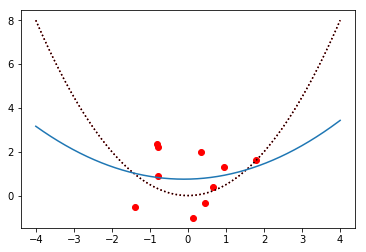

In [65]:
beta_real=np.array([0,0,1.0/2]) #questi sono i coefficienti del polinomio
g=2 #grado del polinomio
N=10 #numero di misure
sigma=1
Cy=sigma*np.identity(N)
x_m1=np.random.normal(0,1,10)
ym=np.empty(N)
W=np.empty((N,g+1))                  #generiamo la matrice W
for j in range(0,g+1,1) :
    for i in range(0,N,1):
        if j==0:
            W[i][j]=1
        else:
            W[i][j]=x_m1[i]**j

#print W

p=np.matmul(W,beta_real)
#print p

ym=np.random.normal(p,sigma)
print ym

plt.plot(x, y, ':r')
plt.plot(x_m1, ym, 'ro')
beta_1=np.linalg.inv(np.matmul(W.transpose(),W))
beta_2=np.matmul(W.transpose(),ym)
beta_stima=np.matmul(beta_1,beta_2)
ys= beta_stima[0]+beta_stima[1]*x+beta_stima[2]*x**2
plt.plot(x, y,':k')
plt.plot(x, ys)

print 'I coefficienti sono:' ,
print('   '.join([str(round(elem,3)) for elem in beta_stima]))

print 'La matrice di covarianza dei parametri stimati è'
Cb=np.linalg.inv(np.matmul(np.matmul(W.transpose(),np.linalg.inv(Cy)),W))
for row in Cb:
    print('    '.join([str(round(elem,4)) for elem in row if elem>0])),
    print('   '.join([str(round(elem,4)) for elem in row if elem<=0]))

[10.02396915  7.87442851  7.68995629  7.54593188 -0.37088598 -1.39253682
 -0.71883124 -0.62648462  9.33359871  7.20107781  7.8971974   6.87442277]
I coefficienti sono: -0.777   -0.057   0.552
La matrice di covarianza dei parametri stimati è
0.25 0.0  -0.01563
0.00781 0.0  0.0
0.00146 -0.01563  -0.0


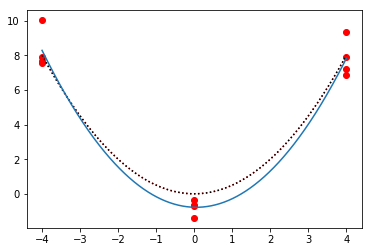

In [72]:
beta_real=np.array([0,0,1.0/2]) #questi sono i coefficienti del polinomio
g=2 #grado del polinomio
N=12 #numero di misure
sigma=1
Cy=sigma*np.identity(N)
x_m1=np.array([-4.0,-4.0,-4.0,-4.0,0.,0.,0.,0.,4.,4.,4.,4.] )
ym=np.empty(N)
W=np.empty((N,g+1))                  #generiamo la matrice W
for j in range(0,g+1,1) :
    for i in range(0,N,1):
        if j==0:
            W[i][j]=1
        else:
            W[i][j]=x_m1[i]**j
#print W

p=np.matmul(W,beta_real)
#print p

ym=np.random.normal(p,sigma)
print ym

plt.plot(x, y, ':r')
plt.plot(x_m1, ym, 'ro')
beta_1=np.linalg.inv(np.matmul(W.transpose(),W))
beta_2=np.matmul(W.transpose(),ym)
beta_stima=np.matmul(beta_1,beta_2)
ys= beta_stima[0]+beta_stima[1]*x+beta_stima[2]*x**2
plt.plot(x, y,':k')
plt.plot(x, ys)

print 'I coefficienti sono:' ,
print('   '.join([str(round(elem,3)) for elem in beta_stima]))

print 'La matrice di covarianza dei parametri stimati è'
Cb=np.linalg.inv(np.matmul(np.matmul(W.transpose(),np.linalg.inv(Cy)),W))
for row in Cb:
    print('    '.join([str(round(elem,5)) for elem in row if elem>0])),
    print('  '.join([str(round(elem,5)) for elem in row if elem<=0]))

In [10]:
x0=np.arange(-4.,4.,0.1)
x1=np.arange(-3.9,4.1,0.1)
x2=np.arange(-3.8,4.2,0.1)

Cb_old=np.matrix([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
for i0 in x0:
    for i1 in x1:
        for i2 in x2:
            W=np.matrix([[1, i0, i0**2], [1, i1, i1**2], [1, i2, i2**2]])
        if np.linalg.det(np.matmul(W.transpose(),W))==0:
            pass
        else:
            Cb=np.linalg.inv(np.matmul(W.transpose(),W))
            if (np.absolute(Cb)<=np.absolute(Cb_old)).all():
                Cb_old=Cb
                #print Cb_old
                X=np.array([i0,i1,i2])
print 'la matrice di covarianza minima trovata è'
print Cb_old
print 'le x a cui corrisponde la Cb minima è'
print X

[[ 1.00000000e+00  6.09756098e-03 -6.09756098e-02]
 [ 6.09756098e-03  3.05575186e-02 -6.50668540e-04]
 [-6.09756098e-02 -6.50668540e-04  5.57732082e-03]]


In [11]:
X

array([-4.00000000e+00,  3.55271368e-15,  4.10000000e+00])

In [58]:
import matplotlib.pyplot as plt
import numpy as np
g=5 #grado del polinomio
N=6 #numero di misure

X=np.random.uniform(-3,3,N)
Xcopy=X
print X
delta=0.1
step=0
while (step<100):
    step+=1
    for i in range(0,N,1):
        W=np.matrix([ [x**j for j in range(g+1)] for x in X])
        Cb=np.linalg.inv(np.matmul(W.transpose(),W))
        Xcopy[i]=X[i]+delta
        Wcopy= np.matrix([ [x**j for j in range(g+1)] for x in Xcopy])
        Cbcopy=np.linalg.inv(np.matmul(Wcopy.transpose(),Wcopy))  
        
        if (np.absolute(Cbcopy)<=np.absolute(Cb)).all():
            X[i]=Xcopy[i]
            
        else:
            Xcopy[i]=X[i]-2*delta
            Wcopy= np.matrix([ [x**j for j in range(g+1)] for x in Xcopy])
            Cbcopy=np.linalg.inv(np.matmul(Wcopy.transpose(),Wcopy))
            if (np.absolute(Cbcopy)<=np.absolute(Cb)).all():
                X[i]=Xcopy[i]
                
            else:
                pass
        if (Xcopy[i]>3 or X[i]<-3):
                break
    print X
    print Cb

print 'la matrice di covarianza minima trovata è'
print Cb
print 'le x a cui corrisponde la Cb minima è'
print X

[-1.708938   -2.90615888 -0.2605818   0.20076636 -1.75040327  0.00482307]
[-1.808938   -3.00615888 -0.2605818   0.20076636 -1.75040327  0.00482307]
[[ 9.98090919e-01  2.66218671e-01 -2.00638495e+01 -2.85335053e+01
  -1.33899466e+01 -2.04535415e+00]
 [ 2.66218671e-01  1.21041522e+01 -3.94905781e+00 -4.44568330e+01
  -3.30865967e+01 -6.45051187e+00]
 [-2.00638495e+01 -3.94905781e+00  6.08748974e+02  8.78248477e+02
   4.16821614e+02  6.42002727e+01]
 [-2.85335053e+01 -4.44568330e+01  8.78248477e+02  1.74415740e+03
   1.01801243e+03  1.80049731e+02]
 [-1.33899466e+01 -3.30865967e+01  4.16821614e+02  1.01801243e+03
   6.50679711e+02  1.20743438e+02]
 [-2.04535415e+00 -6.45051187e+00  6.42002727e+01  1.80049731e+02
   1.20743438e+02  2.29254414e+01]]
[-1.908938   -3.10615888 -0.2605818   0.20076636 -1.75040327  0.00482307]
[[ 9.98453296e-01  2.31356842e-01 -2.00673290e+01 -2.78439346e+01
  -1.27321933e+01 -1.89170418e+00]
 [ 2.31356842e-01  1.09681043e+01 -2.55324760e+00 -2.10954723e+01
  -1